# MOVIE MARKET ANALYTICS 
 **SEEKING INSIGHTS FOR NEW FILM STUDIO**

*GROUP 4-B*

*DSF-FT12-HYBRID*

*TECHNICAL MENTOR : SAMUEL KARU*

## INTRODUCTION

In the rapidly growing world of cinema,there has been an noticeable rise in the originality and creativity of films as seen amongst the leading movie production studios.Recognizing this trend,our company developed a profound interest in entering the film industry.However,succeeding in this highly competitive space does not only require creative ambition but demands data-driven insights to identify the most profitable and successful genres in the industry to persue. 

## BUSINESS UNDERSTANDING

Our company is intrested in venturing into the film industry.The key business problem we want to find the solution to is **determining what types of films are most likely to succeed at the box office**.To do this we have come up with clear objectives that will be a guide to this project to solve the problem at hand. 

The primary objectives are as follows:
1. **Analyze different genre performance based on ratings and votes** to determine and understand what types of movies have historically performed well at the box office.

2. **Examine the influence of directors on movie ratings**.By identifying succesfull directors whose styles or approaches may inspire the new studio's productions.

3. **Uncover key patterns and actionable trends in films success over time**. By comparing release years of films alongside rating data to uncover patterns of diferent genres over the years.

4. **Recommend concrete strategies the business should take in order for them to succeed in the industry**. These recommendation will be based on the insights got after analysing the data we have.


## DATA PREPROCESSING

The data used for this project is sourced from multiple platforms which are: **Internet Movie Database(IMDb)** , 
**Box offic Mojo** , **Rotten Tomatoes** , **TheMovieDB** and **The Numbers**. A thorough Exploratory Data Analysis(EDA) will be performed with a focus on  data from **IMdb**, **Rotten Tomatoes**,**Box office Mojo** and **ThemovieDB**.
As part of the data preprocessing process, we will:

> Clean the data by handling missing values and correcting inconsistencies(Duplicates e.t.c)

> Merge relevant datasets to create a unified dataset that can be analysed easily.
 
> Explore relationships between movie attributes and success metrics through visualizations and descriptive statistics

Through insightful visualizations and statistical exploration, we aim to uncover key patterns and trends that will inform the final business recommendations and help achieve the above stated project objectives.

## DATA PREPARATION(BOX OFFICE MOJO/THE NUMBERS)

## 【1】*Data Exploration*  

In [1]:
# Import neccesary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from scipy.stats import pearsonr

In [6]:
# Load the dataset
Gross_df = pd.read_csv('./Data/bom.movie_gross.csv.gz', compression='gzip')
Gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [7]:
# Load the dataset
Number_df = pd.read_csv("./Data/tn.movie_budgets.csv.gz", compression='gzip')
Number_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## 【2】*Data Cleaning* 

> BOX OFFICE MOJO

In [8]:
# Check info
Gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [9]:
# Check shape of the dataset
Gross_df.shape

(3387, 5)

In [10]:
# check for number of missing values
Gross_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [11]:
# Drop rows with missing values 
Gross_df = Gross_df.dropna(subset=['studio' , 'domestic_gross' , 'foreign_gross'])

In [12]:
# Check for missing values again
Gross_df.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [13]:
# Check info
Gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


In [14]:
# Check for dupicated values
Gross_df.duplicated().sum()

0

In [15]:
# Check the shape
Gross_df.shape

(2007, 5)

In [16]:
# Replacing missing or dash values with NaN, and remove commas
for col in ['domestic_gross', 'foreign_gross']:
    Gross_df[col] = Gross_df[col].astype(str)  # Convert to string first
    Gross_df[col] = Gross_df[col].replace({'—': None, '': None})
    Gross_df[col] = Gross_df[col].str.replace(',', '', regex=False)
    Gross_df[col] = pd.to_numeric(Gross_df[col], errors='coerce')  # Final conversion to numbers

In [21]:
# Save cleaned version of dataset
Gross_df.to_csv('Cleaned_bom.movie_gross.csv')

### *Data exploration and cleaning conclusion(BOM)*

> Data shape was initially, (3387, 5), However after cleaning and removal of missing values the data shape changes to,(2007, 5),There were no duplicated values,there the data can proceed to analysis and visualizations.

> THE NUMBERS

In [17]:
# Check info
Number_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [18]:
# check shape
Number_df.shape

(5782, 6)

In [19]:
# Check for Duplicates
Number_df.duplicated().sum()

0

In [33]:
# Save the data
Number_df.to_csv('Cleaned_tn_movie_budgets.csv')

### *Data exploration and cleaning conclusion(The Numbers)*

> The data from The numbers dataset is in quite mint condition with no missing values or Duplicated values, it has a shape of (5782, 6),showcasing rows and columns respectively.

## 【3】*Data Analysis and Visualization* 

> 1.TOP PERFORMING STUDIOS(OUR COMPETITORS)

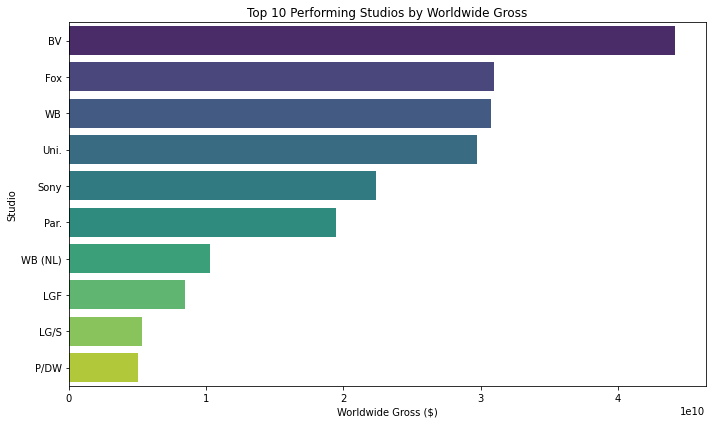

In [22]:
# Calculate worldwide gross
Gross_df['worldwide_gross'] = Gross_df['domestic_gross'] + Gross_df['foreign_gross']

# Group by studio and sum worldwide gross
top_studios = Gross_df.groupby('studio')['worldwide_gross'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x= top_studios.values, y= top_studios.index, palette="viridis")
plt.title('Top 10 Performing Studios by Worldwide Gross')
plt.xlabel('Worldwide Gross ($)')
plt.ylabel('Studio')
plt.tight_layout()
plt.show()

> 2. Domestics vs foreign revenue split

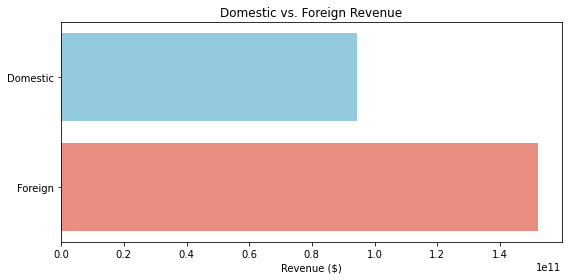

In [23]:
# Sum up total domestic and foreign gross
revenue_split = pd.DataFrame({
    'Revenue': ['Domestic', 'Foreign'],
    'Amount': [Gross_df['domestic_gross'].sum(), Gross_df['foreign_gross'].sum()]
})
# Horizontal bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x='Amount', y='Revenue', data=revenue_split, palette=['skyblue', 'salmon'])
plt.title('Domestic vs. Foreign Revenue')
plt.xlabel('Revenue ($)')
plt.ylabel('')
plt.tight_layout()
plt.show()


> 3. Genre trends vs Gross

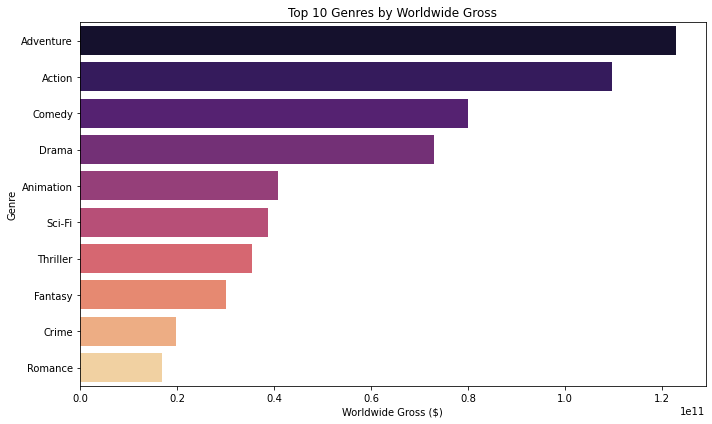

In [24]:
# Load movie_basics dataframe
movie_basics = pd.read_csv('./UnzippedCleanedData/Cleaned_movie_basics.csv')
# Clean and merge data
Gross_df['clean_title'] = Gross_df['title'].str.lower().str.strip()
movie_basics['clean_title'] = movie_basics['primary_title'].str.lower().str.strip()
merged = pd.merge(Gross_df, movie_basics[['clean_title', 'genres']], on='clean_title', how='inner')

# Prepare and plot genre revenue
merged = merged.dropna(subset=['genres', 'worldwide_gross'])
merged['genres'] = merged['genres'].str.split(',')
merged = merged.explode('genres')
merged['genres'] = merged['genres'].str.strip()
genre_gross = merged.groupby('genres')['worldwide_gross'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_gross.values, y=genre_gross.index, palette='magma')
plt.title('Top 10 Genres by Worldwide Gross')
plt.xlabel('Worldwide Gross ($)')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


> 4.Budget vs Gross

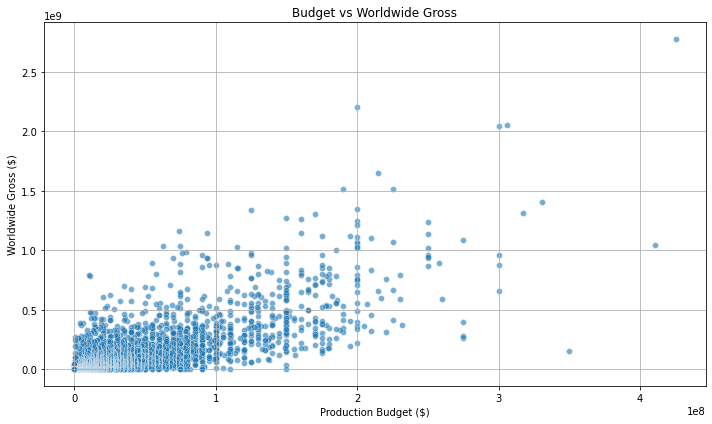

In [25]:
# Load budget data 
budget_df = pd.read_csv("./UnzippedCleanedData/Cleaned_tn_movie_budgets.csv")
# Clean and convert currency columns
for col in ['production_budget', 'domestic_gross', 'worldwide_gross']:
    budget_df[col] = budget_df[col].replace('[\$,]', '', regex=True).astype(float)

# Scatter plot: Budget vs. Worldwide Gross
plt.figure(figsize=(10, 6))
sns.scatterplot(data=budget_df, x='production_budget', y='worldwide_gross', alpha=0.6)
plt.title('Budget vs Worldwide Gross')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


> ## *Data Analytics and visualization conclusion*

- Explanations for created visualizations:

1. **TOP PERFORMING STUDIOS(OUR COMPETITORS)**
- VISUALIZATION: Bar Plot of Total Worldwide Gross by Studio

- EXPLANATION:This bar plot highlights the top 10 movie studios by total worldwide gross revenue. It helps identify the dominant studios in the film industry, showcasing which studios consistently produce high-grossing films. These studios represent our key competitors in terms of global reach and box office performance.
2. **DOMESTIC VS FOREIGN REVENUE SPLIT**
- VISUALIZATION: Horizontal side-by-side bar chart.

- EXPLANATION: The chart shows how studios earn revenue across domestic markets and foreign ones. It reveals whether a studio relies more heavily on local audiences or global audiences. For instance, some studios may earn the majority of their box office from international audiences, indicating strong overseas marketing and localization strategies. Understanding this split can guide our own studio's distribution and marketing priorities.
3. **GENRE VS GROSS**
- VISUALIZATION: Horizontal bar plot of Worldwide Gross vs Genre 

- EXPLANATION:This visualization shows which genres generate the highest total worldwide gross. By splitting and aggregating multi-genre entries, we get a clear view of the most profitable film types (e.g., action, adventure, animation).This insight helps align production strategies with market demand, allowing our studio to focus on genres that resonate with large audiences and maximize revenue potential.
4. **BUDGET VS GROSS**
- VISUALIZATION: Scatter Plot of Production Budget vs Worldwide Gross

- EXPLANATION: The scatter plot compares production budgets to worldwide gross revenue, showing the relationship between investment and returns.A positive correlation is usually visible, where higher-budget films tend to earn more, though not always proportionally.Outliers (low-budget, high-gross films) can reveal high ROI opportunities. This chart helps assess risk vs reward, guiding smarter budgeting decisions based on historical performance.


 ## 【4】*Hypothesis Testing* 

> 1.**Domestic vs Foreign Revenue Split (Paired T-Test)**

Null Hypothesis(H0): The averages of both Domestic and Foreign revenue are equal.

Alternative Hypothesis(H1): There is a significant difference between the averages of Domestic and foreign revenue.

In [27]:
# loading  the cleaned datasets
Gross_df = pd.read_csv('./UnzippedCleanedData/Cleaned_bom.movie_gross.csv')
budget_df = pd.read_csv('./UnzippedCleanedData/Cleaned_tn_movie_budgets.csv')

# Clean titles to help with merging
Gross_df['clean_title'] = Gross_df['title'].str.lower().str.strip()
budget_df['clean_title'] = budget_df['movie'].str.lower().str.strip()

# Merge on clean title
merged_df = pd.merge(budget_df, Gross_df, on='clean_title', how='inner')

# Fix column names 
merged_df.rename(columns={
    'domestic_gross_y': 'domestic_gross',
    'foreign_gross_y': 'foreign_gross'
}, inplace=True)

# Convert gross columns to numeric
merged_df['domestic_gross'] = pd.to_numeric(merged_df['domestic_gross'], errors='coerce')
merged_df['foreign_gross'] = pd.to_numeric(merged_df['foreign_gross'], errors='coerce')

# Drop rows where gross values are NaN or zero
rev_df = merged_df.dropna(subset=['domestic_gross', 'foreign_gross']).copy()
rev_df = rev_df[(rev_df['domestic_gross'] > 0) & (rev_df['foreign_gross'] > 0)]

In [28]:
# Paired t-test
t_stat, p_val = ttest_rel(rev_df['domestic_gross'], rev_df['foreign_gross'])
print(f"Paired T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")

if p_val < 0.05:
    print("The Domestic and foreign grosses are significantly different (reject H₀).")
else:
    print("There is no significant difference between domestic and foreign revenue (fail to reject H₀).")


Paired T-statistic: -10.71, P-value: 0.0000
The Domestic and foreign grosses are significantly different (reject H₀).


Since the p-value(rounded) < 0.05 , We are cleared to reject the null hypothesis.There is a statistically significant difference between domestic and foreign revenue. On average, one outperforms the other.

> 2.High vs Low Budget ROI Comparison (T-Test)

Null Hypothesis(H0): ROI is the same regardless if the film is high budget or low budget.

Alternative Hypothesis(H1): ROI differs significantly between high budget and low budget films

In [29]:
# Loading cleaned datasets
Gross_df = pd.read_csv('./UnzippedCleanedData/Cleaned_bom.movie_gross.csv')
budget_df = pd.read_csv('./UnzippedCleanedData/Cleaned_tn_movie_budgets.csv')

# Clean titles to help with merging
Gross_df['clean_title'] = Gross_df['title'].str.lower().str.strip()
budget_df['clean_title'] = budget_df['movie'].str.lower().str.strip()

# Merge datasets on clean title
merged_df = pd.merge(budget_df, Gross_df, on='clean_title', how='inner')

# Fix column names
merged_df.rename(columns={
    'domestic_gross_y': 'domestic_gross',
    'foreign_gross_y': 'foreign_gross'
}, inplace=True)

# Convert relevant columns to numeric (removing $ and commas)
merged_df['production_budget'] = merged_df['production_budget'].replace('[\$,]', '', regex=True).astype(float)
merged_df['worldwide_gross'] = merged_df['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Drop rows with missing or zero budget/gross
roi_df = merged_df.dropna(subset=['production_budget', 'worldwide_gross']).copy()
roi_df = roi_df[(roi_df['production_budget'] > 0) & (roi_df['worldwide_gross'] > 0)]

In [30]:
# Calculate ROI = Gross / Budget
roi_df['ROI'] = roi_df['worldwide_gross'] / roi_df['production_budget']

# Median split into high and low budget
median_budget = roi_df['production_budget'].median()
high_budget = roi_df[roi_df['production_budget'] >= median_budget]
low_budget = roi_df[roi_df['production_budget'] < median_budget]

# Run independent t-test on ROI
t_stat, p_val = ttest_ind(high_budget['ROI'], low_budget['ROI'], equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")

if p_val < 0.05:
    print("There is a significant difference in ROI between high and low budget films (reject H₀).")
else:
    print("No significant difference in ROI between high and low budget films (fail to reject H₀).")


T-statistic: -3.60, P-value: 0.0004
There is a significant difference in ROI between high and low budget films (reject H₀).


The T-statistic(-3.60),indicates that the mean ROI for low-budget films is significantly higher than that for high-budget films (the negative value suggests the direction).

The p-value < 0.05 therefore we have a clear to reject the null hypothesis.

Low-budget films, on average, tend to have a higher return on investment than high-budget films.This suggests that while big-budget films often bring in large gross revenues, they don't necessarily yield proportionally higher returns relative to their cost.

> 3. Budget Impact on Gross(Correlation Test)

Null Hypothesis(H0): There is no correlation between Budget and Worldwide Gross.

Alternative Hypothesis(H1): There is a significant correlation between Budget and worldwide Gross.

In [31]:
# Loading cleaned datasets
Gross_df = pd.read_csv('./UnzippedCleanedData/Cleaned_bom.movie_gross.csv')
budget_df = pd.read_csv('./UnzippedCleanedData/Cleaned_tn_movie_budgets.csv')

# Clean titles to help with merging
Gross_df['clean_title'] = Gross_df['title'].str.lower().str.strip()
budget_df['clean_title'] = budget_df['movie'].str.lower().str.strip()

# Merge datasets on clean title
merged_df = pd.merge(budget_df, Gross_df, on='clean_title', how='inner')

# Fix column names
merged_df.rename(columns={
    'domestic_gross_y': 'domestic_gross',
    'foreign_gross_y': 'foreign_gross'
}, inplace=True)

# Convert relevant columns to numeric (removing $ and commas)
merged_df['production_budget'] = merged_df['production_budget'].replace('[\$,]', '', regex=True).astype(float)
merged_df['worldwide_gross'] = merged_df['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Drop rows with missing or zero budget/gross
df_corr = merged_df.dropna(subset=['production_budget', 'worldwide_gross'])

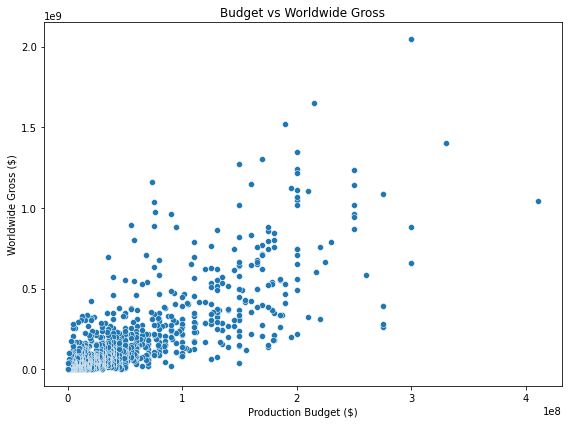

Pearson Correlation: 0.77, P-value: 0.0000
There is significant correlation between budget and gross (reject H₀).


In [32]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_corr, x='production_budget', y='worldwide_gross')
plt.title('Budget vs Worldwide Gross')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')
plt.tight_layout()
plt.show()

# Pearson correlation test
corr, p_value = pearsonr(df_corr['production_budget'], df_corr['worldwide_gross'])
print(f"Pearson Correlation: {corr:.2f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("There is significant correlation between budget and gross (reject H₀).")
else:
    print("There is no significant correlation found between budget and gross (fail to reject H₀).")

The pearson correlation coefficient = 0.77, which indicates that there is a strong positive correlation between budget and Gross, suggesting that as production budget increases, the worldwide gross also tends to increase significantly.
The p-value < 0.05,Since the p-value is far below 0.05, you can reject the null hypothesis. The result is statistically significant and unlikely due to random chance.

## CONCLUSION

Through a series of statistical tests and visualizations, we derived meaningful business insights from historical movie data:

> **BUSINESS RECOMMENDATIONS**

> 1. Domestic VS Foreign Market Gross

The Paired t-test revealed a significant difference between domestic and foreign grosses (t = -10.71, p < 0.0001).Indicating that Foreign markets often contribute more to a film’s revenue than domestic markets, underlining the importance of global distribution strategies.

> 2. Budget VS Return On Investment(ROI)

The T-test between high-budget and low-budget films showed that low-budget films have significantly higher ROI (t = -3.60, p = 0.0004).While big budgets can generate high gross, lower-budget films tend to be more efficient in converting investment into profit. This supports the value of lean(What the customer is willing to pay for), targeted productions.

 >   3. Budget VS Worldwide Gross

We got a strong positive Pearson correlation between budget and worldwide gross: r = 0.77, p < 0.0001.Bigger budgets are associated with higher gross, indicating the effectiveness of investment in production and marketing.

> 4. Benchmark against Top Studios

We identified the top-performing studios based on box office revenue. Analyzing their business models, marketing strategies, and production choices can offer valuable insights into industry best practices. By understanding how these successful studios operate, we can refine our own strategies and position ourselves more competitively in the market.